# **Project Overview**
In this project, I analyze critical product metrics, including pricing, customer reviews, ratings, revenue, and website traffic, to uncover actionable insights that drive business growth for an online sports apparel retailer. The goal is to identify key trends and patterns that can inform data-driven decisions to optimize pricing strategies, enhance customer experience, and boost overall revenue.

By leveraging four distinct datasets, I provide a comprehensive analysis that not only reveals areas for improvement but also highlights opportunities to better align product offerings with customer preferences. The insights from this analysis will guide strategic decisions on pricing, product positioning, and marketing tactics, ultimately helping the business to increase profitability and enhance customer satisfaction.


The primary objective of this analysis is to:
1. **Identify revenue drivers**: Understand how pricing, discounts, and customer sentiment impact revenue.
2. **Optimize product offerings**: Analyze product descriptions, ratings, and reviews to identify areas for improvement.
3. **Provide actionable recommendations**: Equip the marketing and sales teams with data-driven strategies to enhance customer satisfaction and increase revenue.


### **Key Questions**

- **Brand Performance Comparison**  
  - Are there significant differences in performance across different **brands**? 
  - How does each **brand** perform across various **pricing categories**?

- **Customer Feedback and Revenue**  
  What is the relationship between **customer ratings and reviews** and **revenue**?

- **Influence of Product Description Length**  
  How does the **length of product descriptions** affect **customer engagement** and **ratings**?

- **Impact of Customer Sentiment on Revenue**  
  How does **customer sentiment** influence **revenue**?


# Data Preparation

## Data Structure



<!-- ## **Data Overview**   -->

This analysis leverages four key datasets, each providing unique insights into product performance. Below is an overview of the datasets:

### **1. `brands.csv`**
Contains brand information for each product.

| **Column**      | **Description**                          |
|-----------------|------------------------------------------|
| `product_id`    | Unique identifier for each product       |
| `brand`         | Brand name (e.g., Adidas, Nike)          |

---

### **2. `finance.csv`**
Contains pricing and revenue details for each product.

| **Column**      | **Description**                              |
|-----------------|----------------------------------------------|
| `product_id`    | Unique identifier for each product           |
| `listing_price` | Original price of the product                |
| `sale_price`    | Discounted price of the product              |
| `discount`      | Discount applied to the original price (as a decimal) |
| `revenue`       | Revenue generated by the product             |

---

### **3. `info.csv`**
Contains descriptive information for each product.

| **Column**      | **Description**                              |
|-----------------|----------------------------------------------|
| `product_name`  | Name of the product                          |
| `product_id`    | Unique identifier for each product           |
| `description`   | Brief description of the product             |

---

### **4. `reviews.csv`**
Contains customer reviews and ratings for each product.

| **Column**      | **Description**                              |
|-----------------|----------------------------------------------|
| `product_id`    | Unique identifier for each product           |
| `rating`        | Average rating of the product (1–5)          |
| `reviews`       | Number of reviews for the product            |


## Data Cleaning

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-apparel-retail-data/finance.csv
/kaggle/input/sports-apparel-retail-data/brands.csv
/kaggle/input/sports-apparel-retail-data/reviews.csv
/kaggle/input/sports-apparel-retail-data/info.csv


In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Load the data
brands = pd.read_csv('/kaggle/input/sports-apparel-retail-data/brands.csv')
finance = pd.read_csv('/kaggle/input/sports-apparel-retail-data/finance.csv')
info = pd.read_csv('/kaggle/input/sports-apparel-retail-data/info.csv')
reviews = pd.read_csv('/kaggle/input/sports-apparel-retail-data/reviews.csv')

In [5]:
# Merge the data and drop null values
merged_df = info.merge(finance, on="product_id")
merged_df = merged_df.merge(reviews, on="product_id")
merged_df = merged_df.merge(brands, on="product_id")

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   3120 non-null   object 
 1   product_id     3179 non-null   object 
 2   description    3117 non-null   object 
 3   listing_price  3120 non-null   float64
 4   sale_price     3120 non-null   float64
 5   discount       3120 non-null   float64
 6   revenue        3120 non-null   float64
 7   rating         3120 non-null   float64
 8   reviews        3120 non-null   float64
 9   brand          3120 non-null   object 
dtypes: float64(6), object(4)
memory usage: 248.5+ KB


In [7]:
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percent)

product_name     1.855930
product_id       0.000000
description      1.950299
listing_price    1.855930
sale_price       1.855930
discount         1.855930
revenue          1.855930
rating           1.855930
reviews          1.855930
brand            1.855930
dtype: float64


We consider losing ~1.86% of data is acceptable, we remove any rows that contain missing values to ensure data integrity.

In [8]:
merged_df.dropna(inplace=True)

In [9]:
# Handle any infinite values in the dataset first
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

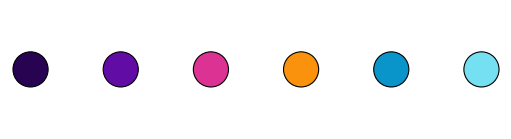

In [15]:
import matplotlib.pyplot as plt

# Define the custom color palette
custom_palette = ['#270352', '#620CA6', '#DC3293', '#FA920D', '#0995CA', '#74E0F2']

# Create a figure to display the colors as small circles
fig, ax = plt.subplots(figsize=(8, 2), dpi=80)

# Generate positions for the circles
x_positions = range(len(custom_palette))

# Plot each color as a small circle
ax.scatter(x_positions, [1] * len(custom_palette), c=custom_palette, s=1000, edgecolors='black', marker='o')

# Hide axes for better aesthetic
ax.axis('off')

# Title
plt.title('', fontsize=16, weight='bold', color='black')

# Show the plot
plt.show()


# Brand Performance Across Price Categories

In [10]:
distinct_brands = merged_df['brand'].unique()
print(distinct_brands)


['Adidas' 'Nike']


The store mainly has two brands:

- **Adidas**
- **Nike**


We analyze how Adidas and Nike perform across different price categories by calculating:

- **Number of products** in each category.
- **Mean revenue** generated by each category.

This allows us to see how each brand positions its products and how pricing affects revenue.

## Product Price Segmentation

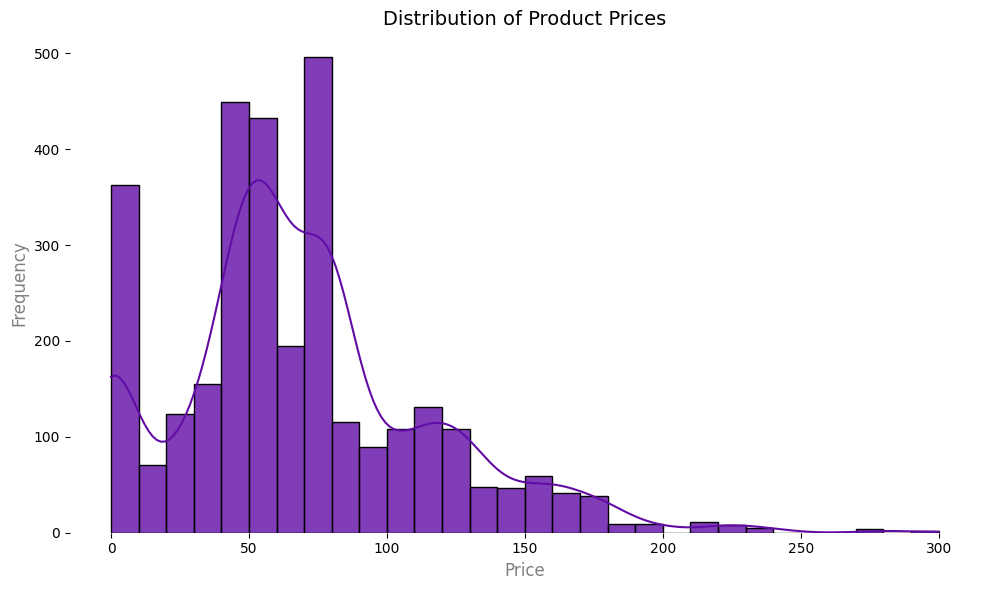

In [16]:
# Create the histogram for product price distribution
fig, ax2 = plt.subplots(figsize=(10, 6))

sns.histplot(merged_df['listing_price'], bins=30, kde=True, ax=ax2, color=custom_palette[1], alpha=0.8)

# Set labels and title for price distribution plot
ax2.set_ylabel("Frequency", fontsize=12, color="gray")
ax2.set_title("Distribution of Product Prices", fontsize=14, color="black")

# Remove grid and spines for a clean look
ax2.grid(False)
sns.despine(left=True, bottom=True)

# Adjust x-axis ticks and labels
ax2.set_xlabel("Price", fontsize=12, color="gray")
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


To analyze products based on price, we divide them into four quartiles:

- **Budget**: Lowest 25% of listing prices.
- **Average**: 25-50% range.
- **Expensive**: 50-75% range.
- **Elite**: Top 25% of listing prices.

This classification helps us compare product performance across different price segments.

In [18]:
# Add price labels based on listing_price quartiles
merged_df["price_label"] = pd.qcut(merged_df["listing_price"], q=4, labels=["Budget", "Average", "Expensive", "Elite"])

In [19]:
# Group by brand and price_label to get volume and mean revenue
adidas_vs_nike = merged_df.groupby(["brand", "price_label"], as_index=False, observed=False).agg(
    num_products=("price_label", "count"),
    mean_revenue=("revenue", "mean")
).round(2)

print(adidas_vs_nike)


    brand price_label  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


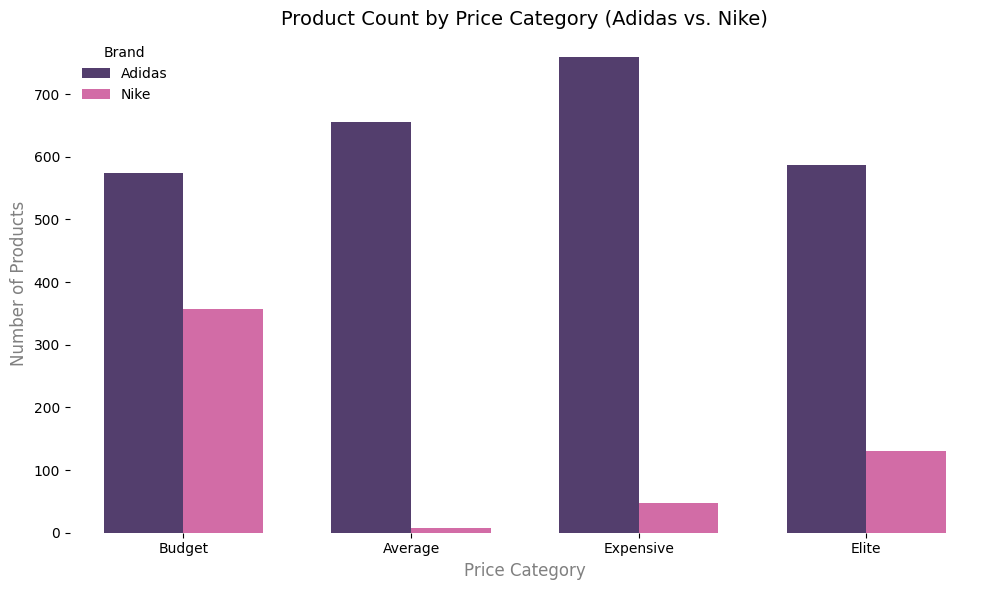

In [20]:

# Create the bar plot for number of products
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=adidas_vs_nike, x="price_label", y="num_products", hue="brand", palette={ 
    "Adidas": custom_palette[0], 
    "Nike": custom_palette[2]
}, ax=ax1, alpha=0.8, width=0.7)

# Set labels and title for product count plot
ax1.set_ylabel("Number of Products", fontsize=12, color="gray")
ax1.set_title("Product Count by Price Category (Adidas vs. Nike)", fontsize=14, color="black")

# Remove grid and spines for a clean look
ax1.grid(False)
sns.despine(left=True, bottom=True)

# Adjust x-axis ticks and labels
ax1.set_xlabel("Price Category", fontsize=12, color="gray")
plt.xticks(rotation=0)

# Adjust legend position
ax1.legend(title="Brand", loc='upper left', fontsize=10, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


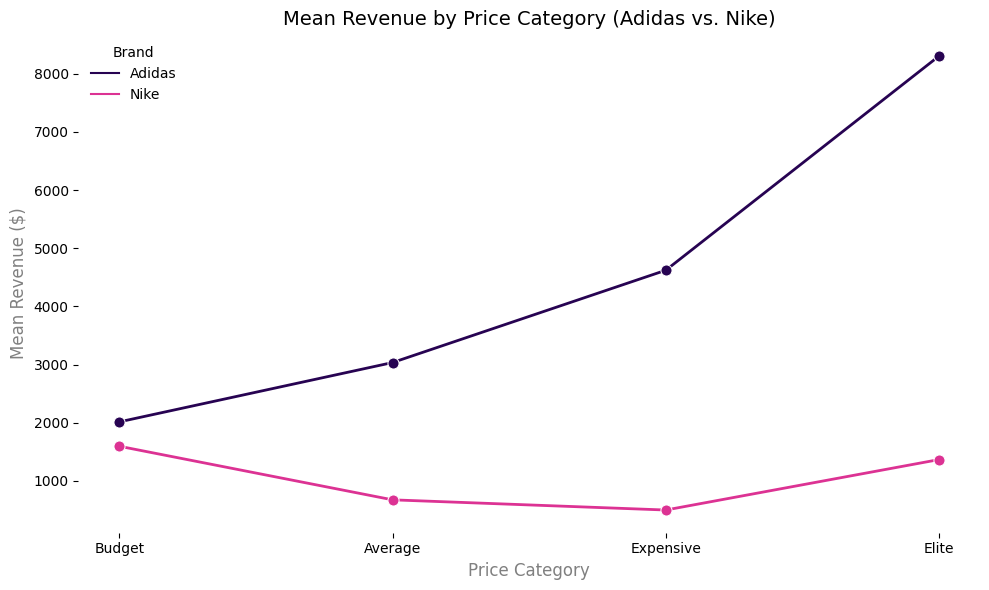

In [21]:

# Create the line plot for mean revenue 
fig, ax2 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=adidas_vs_nike, x="price_label", y="mean_revenue", hue="brand", marker="o", palette={ 
    "Adidas": custom_palette[0], 
    "Nike": custom_palette[2]
}, ax=ax2, linewidth=2, markersize=8)

# Set labels and title for mean revenue plot
ax2.set_ylabel("Mean Revenue ($)", fontsize=12, color="gray")
ax2.set_title("Mean Revenue by Price Category (Adidas vs. Nike)", fontsize=14, color="black")

# Remove grid and spines for a clean look
ax2.grid(False)
sns.despine(left=True, bottom=True)

# Adjust x-axis ticks and labels
ax2.set_xlabel("Price Category", fontsize=12, color="gray")
plt.xticks(rotation=0)

# Adjust legend position
ax2.legend(title="Brand", loc='upper left', fontsize=10, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


### **Key insights**
**Product Range**  
   - Adidas dominates **"Expensive"** and **"Average"** categories, targeting premium and mid-range customers.  
   - Nike has fewer high-end products, focusing more on budget-conscious buyers, except for its elite offerings.  

 **Revenue Trends**  
   - Adidas earns significantly more in expensive categories, excelling in premium markets.  
   - Nike’s revenue drops in high-end segments, except for elite products, highlighting its focus on affordability.  

 **Average Revenue**  
   - Nike’s average revenue is lower than Adidas, with a huge gap in the highest price categories.  

 **Strategic Insights**  
   - Adidas leverages premium positioning for higher margins.  
   - Nike prioritizes volume and accessibility but lags in luxury markets.  

### **Recommendations**  
   - Adidas: Strengthen high-end innovation and exclusivity.  
   - Nike: Expand premium offerings to compete in luxury segments.  

# Impact of Product Description Length on Ratings and Reviews

### Objective
Determine if detailed descriptions correlate with higher ratings and reviews.

### Method
- Measured description length and categorized into bins (e.g., 100–200 characters).
- Calculated mean rating and total reviews for each bin.

In [15]:
# Store the length of each description
merged_df["description_length"] = merged_df["description"].str.len()

# Upper description length limits
lengthes = [0, 100, 200, 300, 400, 500, 600, 700]

# Description length labels
labels = ["100", "200", "300", "400", "500", "600", "700"]

# Cut into bins
merged_df["description_length"] = pd.cut(merged_df["description_length"], bins=lengthes, labels=labels)

# Group by the bins
description_lengths = merged_df.groupby("description_length", as_index=False).agg(
    mean_rating=("rating", "mean"),
    total_reviews=("reviews", "sum")
).round(2)

print(description_lengths)

  description_length  mean_rating  total_reviews
0                100         2.26           36.0
1                200         3.19        17719.0
2                300         3.28        76115.0
3                400         3.29        28994.0
4                500         3.35         4984.0
5                600         3.12          852.0
6                700         3.65          818.0


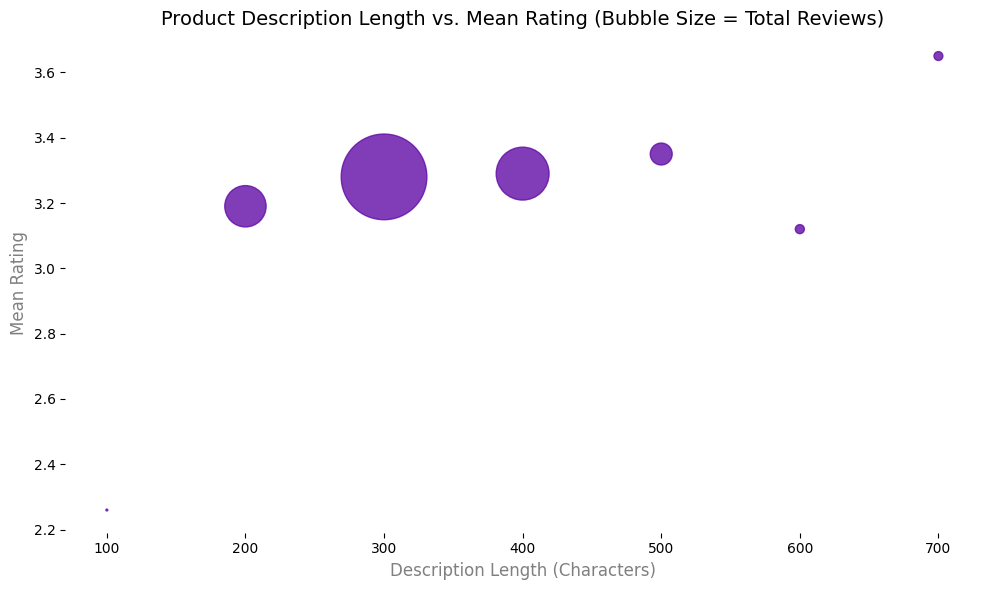

In [16]:
description_length = description_lengths["description_length"].astype(int)
mean_rating = description_lengths["mean_rating"]
total_reviews = description_lengths["total_reviews"]


# Create the scatter plot with a clean, minimalist design
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with bubble size corresponding to total reviews
scatter = ax.scatter(description_length, mean_rating, s=np.array(total_reviews)/20, alpha=0.8, color=custom_palette[1])

# Set labels and title
ax.set_xlabel('Description Length (Characters)', fontsize=12, color="gray")
ax.set_ylabel('Mean Rating', fontsize=12, color="gray")
ax.set_title('Product Description Length vs. Mean Rating (Bubble Size = Total Reviews)', fontsize=14, color="black")

# Remove grid and spines for a clean look
ax.grid(False)
sns.despine(left=True, bottom=True)

# Adjust x-axis and y-axis ticks
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### **Key Insights**

 **Description Length and Ratings**:
   - **Shorter descriptions (100 chars)** have the **lowest mean rating (2.26)**.
   - Ratings improve with length, peaking at **500 chars (3.35)** and **700 chars (3.65)**.
   - A dip at **600 chars (3.12)** suggests overly long descriptions may not always help.

 **Description Length and Reviews**:
   - **300 chars** has the **most reviews (76,115)**, indicating optimal engagement.
   - **100 chars** has the **fewest reviews (36)**, showing insufficient detail deters interaction.
   - **500+ chars** have fewer reviews, possibly due to overwhelming detail.

 **Optimal Length**:
   - **300–500 chars** is the sweet spot, balancing **high ratings (3.28–3.35)** and **high engagement (28,994–76,115 reviews)**.
   - **700 chars** has the **highest rating (3.65)** but fewer reviews, making it less effective for engagement.

-> Longer descriptions improve ratings but may reduce engagement. Balance is key.

### **Recommendations**
- Aim for **300–500 chars** for descriptions.
- Avoid descriptions under **200 chars**.
- Test **700-char descriptions** further to assess trade-offs.

# Impact of Customer Sentiment on Revenue

## Customer Sentiment Segmentation

To analyze ratings, we categorize them into three sentiment groups:

- Negative: Ratings between 1 and 2.
- Neutral: Ratings between 2 and 3.
- Positive: Ratings between 3 and 5.
  


This classification allows us to compare the mean revenue for each sentiment group.

In [17]:
# Categorize ratings into sentiment groups
merged_df["sentiment"] = pd.cut(merged_df["rating"], bins=[0, 2, 3, 5], labels=["Negative", "Neutral", "Positive"])

# Group by brand and sentiment
sentiment_analysis = merged_df.groupby(["brand", "sentiment"], as_index=False).agg(
    count=("sentiment", "count")
)

# Pivot the data for visualization
sentiment_pivot = sentiment_analysis.pivot(index="brand", columns="sentiment", values="count")

In [18]:
# Calculate the total number of reviews for each brand
sentiment_pivot["Total"] = sentiment_pivot.sum(axis=1)

# Calculate the percentage of each sentiment category
sentiment_pivot["Negative (%)"] = (sentiment_pivot["Negative"] / sentiment_pivot["Total"]) * 100
sentiment_pivot["Neutral (%)"] = (sentiment_pivot["Neutral"] / sentiment_pivot["Total"]) * 100
sentiment_pivot["Positive (%)"] = (sentiment_pivot["Positive"] / sentiment_pivot["Total"]) * 100

# Display the result
print(sentiment_pivot[["Negative (%)", "Neutral (%)", "Positive (%)"]])

sentiment  Negative (%)  Neutral (%)  Positive (%)
brand                                             
Adidas         9.584665    25.319489     65.095847
Nike           2.816901     7.605634     89.577465


In [26]:

# Data for Adidas and Nike
adidas_sentiment = sentiment_pivot.loc["Adidas", ["Negative (%)", "Neutral (%)", "Positive (%)"]]
nike_sentiment = sentiment_pivot.loc["Nike", ["Negative (%)", "Neutral (%)", "Positive (%)"]]

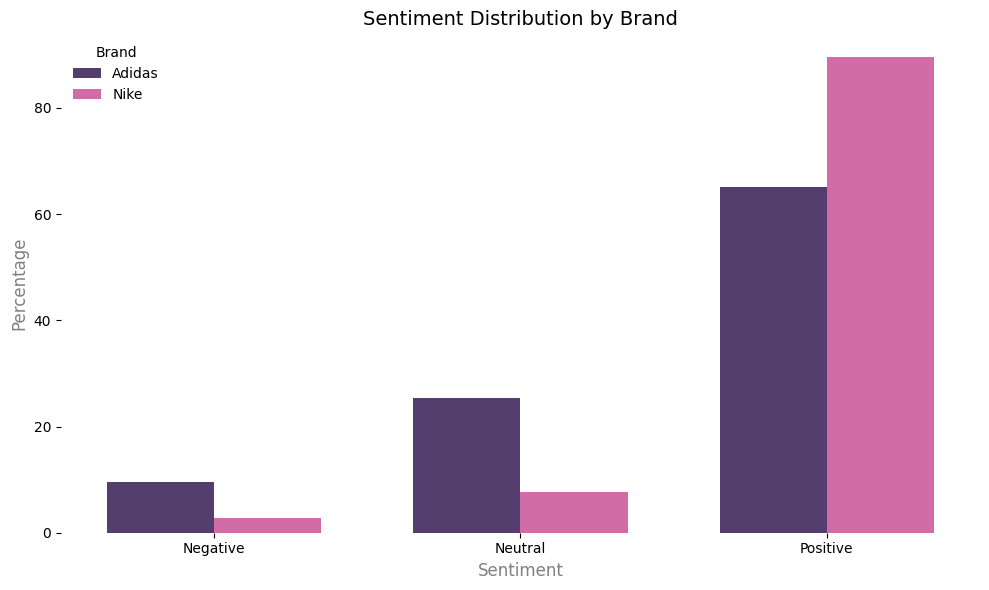

In [28]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sentiment bars
sns.barplot(x=["Negative", "Neutral", "Positive"] * 2, 
            y=list(adidas_sentiment) + list(nike_sentiment), 
            hue=["Adidas"] * 3 + ["Nike"] * 3, 
             palette={ 
    "Adidas": custom_palette[0], 
    "Nike": custom_palette[2]
}, 
            alpha=0.8, width=0.7, ax=ax)

# Set labels and title
ax.set_xlabel("Sentiment", fontsize=12, color="gray")
ax.set_ylabel("Percentage", fontsize=12, color="gray")
ax.set_title("Sentiment Distribution by Brand", fontsize=14, color="black")

# Remove grid and spines for a clean look
ax.grid(False)
sns.despine(left=True, bottom=True)

# Adjust legend position
ax.legend(title="Brand", loc='upper left', fontsize=10, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


### **Observations**

**Adidas**:
   - **65.10% Positive**: Majority of customers are satisfied.
   - **25.32% Neutral**: A significant portion of customers are indifferent, indicating room for improvement.
   - **9.58% Negative**: A small but notable percentage of customers are dissatisfied.

**Nike**:
   - **89.39% Positive**: Very high customer satisfaction.
   - **7.82% Neutral**: Fewer indifferent customers compared to Adidas.
   - **2.79% Negative**: Very low dissatisfaction rate.


### **Key Insights**
- **Nike** has a higher percentage of **Positive** reviews (89.39%) compared to **Adidas** (65.10%), suggesting stronger customer satisfaction.
- **Adidas** has a higher percentage of **Neutral** reviews (25.32%), indicating opportunities to improve customer experience and convert neutral sentiment into positive sentiment.
- Both brands have relatively low **Negative** reviews, but Adidas has a higher percentage (9.58%) compared to Nike (2.79%).


### **Recommendations**

**For Adidas**:
   - Focus on improving customer experience to reduce **Neutral** and **Negative** reviews.
   - Analyze feedback from **Neutral** reviews to identify areas for improvement.

**For Nike**:
   - Maintain the high level of customer satisfaction by continuing to deliver quality products and services.
   - Address the small percentage of **Negative** reviews to further enhance customer loyalty.


## Customer Sentiment as a Driver of Revenue

### **Objective**
- Investigate how customer sentiment (Negative, Neutral, Positive) impacts revenue.
- Determine whether higher customer satisfaction correlates with higher revenue.

### **Method**

- Group by Sentiment and Calculate Mean Revenue
- Use a bar plot to show the relationship between sentiment categories and mean revenue.

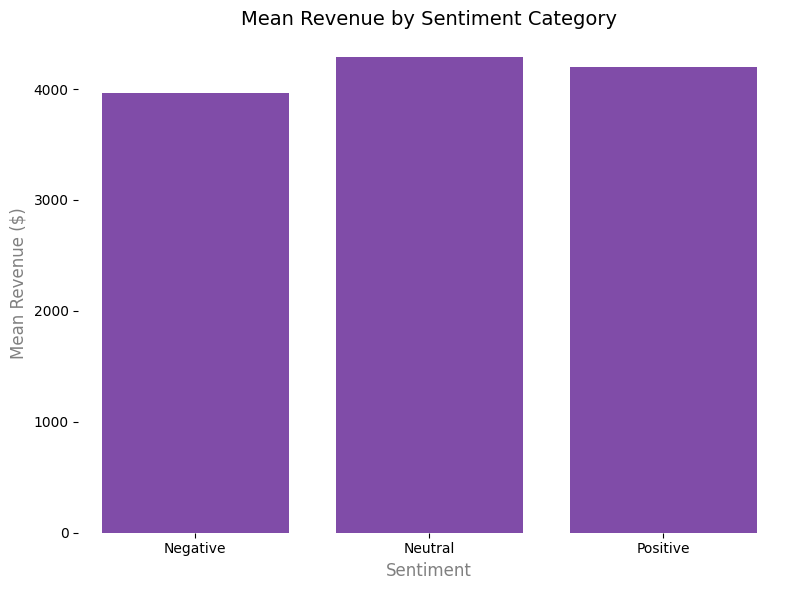

In [31]:
# Group by sentiment and calculate mean revenue
sentiment_revenue_analysis = merged_df.groupby("sentiment", as_index=False)["revenue"].mean().round(2)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the sentiment vs. mean revenue
sns.barplot(data=sentiment_revenue_analysis, x="sentiment", y="revenue", color=custom_palette[1], alpha=0.8, ax=ax)

# Set labels and title
ax.set_xlabel("Sentiment", fontsize=12, color="gray")
ax.set_ylabel("Mean Revenue ($)", fontsize=12, color="gray")
ax.set_title("Mean Revenue by Sentiment Category", fontsize=14, color="black")

# Remove grid and spines for a clean look
ax.grid(False)
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show()



### **Interpretation**
- **Revenue increases with sentiment**, but **Neutral** products slightly outperform **Positive** ones.
- **Possible reasons**: Customers prefer moderately priced, average-rated products.


### **Recommendations**
- Improve **Negative** products to boost satisfaction and revenue.
- Leverage **Neutral** products by enhancing quality or features.
- Investigate why **Neutral** products outperform Positive ones.